In [1]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
%load_ext autoreload
%autoreload 1
%aimport redditClient


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from redditClient import redditClient

In [8]:
# construct Reddit client
client = redditClient()

subreddit = client.subreddit('programming')
top_post = next(subreddit.top(limit=1))

In [36]:
author_name = top_post.author.name

In [37]:
author_name

'GhostalMedia'

In [35]:
G1 = nx.Graph()

# Get the comments from the top post
top_post.comments.replace_more(limit=None)
comments = top_post.comments.list()

# Add nodes and edges to the graph based on comments and their replies
for comment in comments:
    user1 = comment.author.name if comment.author else "Unknown"
    
    # Add node for the user
    G1.add_node(user1)
    
    # Check if comment has a parent that's not the submission itself
    if comment.parent() != top_post:
        user2 = comment.parent().author.name if comment.parent().author else "Unknown"
        
        # Add edge between the user and the parent comment's user
        G1.add_edge(user1, user2)

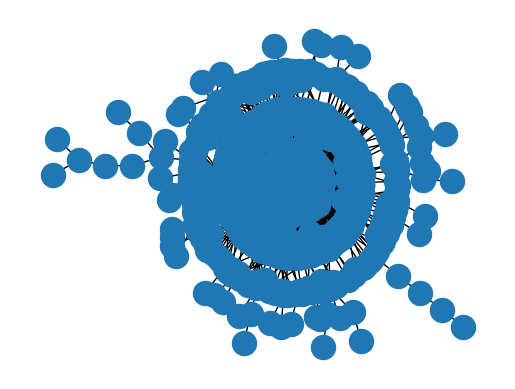

In [42]:
nx.draw_networkx(G1, arrows=True, with_labels=False, pos=nx.kamada_kawai_layout(G1, scale=2))
plt.axis('off')
plt.show()

This is a net of tht top reddit user (id:144sn8r, username: GhostalMedia),

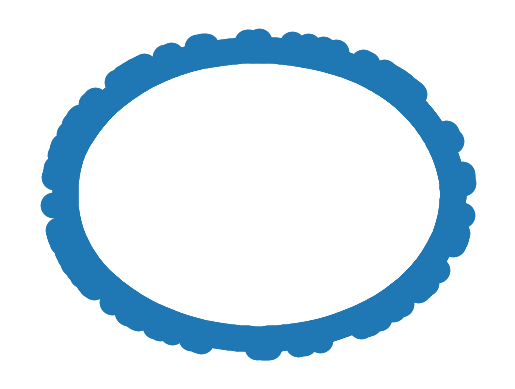

In [43]:
degree_one_nodes = [node for node, degree in dict(G.degree()).items() if degree == 1]

# Create a subgraph using only degree one nodes
subgraph = G.subgraph(degree_one_nodes)

# Visualize the subgraph
nx.draw_networkx(subgraph, arrows=True, with_labels=False, pos=nx.kamada_kawai_layout(subgraph, scale=2))
plt.axis('off')
plt.show()

This is the 1-degree graph of the top user. It can be seen that the top post user in programming has probably helped many people, and many people have only connect to him.

In [15]:
pos = nx.spring_layout(graph)

In [21]:


subreddit = client.subreddit('programming')

G = nx.Graph()
# Collect the top 20 posts (you can adjust this number or use other sorting methods)
top_posts = subreddit.top(limit=20)

In [25]:

for submission in top_posts:  # Adjust the limit as needed
    submission.comments.replace_more(limit=5)
    for comment in submission.comments.list():
        if comment.parent() != submission:
            # Check if the comment's author and parent's author exist before creating an edge
            if comment.author and comment.parent().author:
                G.add_edge(comment.author.name, comment.parent().author.name)

In [26]:
import community

# Applying Louvain method
partitions = community.best_partition(G)

# Displaying the communities
for user, community_id in partitions.items():
    print(f"User {user} is in community {community_id}")

User nickiter is in community 0
User lukeautry is in community 0
User Swie is in community 0
User mrcrassic is in community 0
User TEKC0R is in community 1
User carb0n13 is in community 0
User yur_mom is in community 0
User quangtit01 is in community 0
User satysin is in community 0
User issafram is in community 2
User role34 is in community 0
User Supergaz is in community 0
User tehbored is in community 3
User ThatITguy2015 is in community 0
User spockspeare is in community 0
User B00Mshakal0l0 is in community 0
User RunninADorito is in community 0
User cdarwin is in community 0
User kskulski is in community 0
User cballowe is in community 4
User cyanydeez is in community 0
User el_padlina is in community 5
User snerp is in community 0
User travistrue is in community 0
User agolec is in community 0
User Significant-Till-306 is in community 0
User thomasw17 is in community 0
User Shaz_berries is in community 0
User NAN001 is in community 0
User DrunkMc is in community 0
User ralphpotat

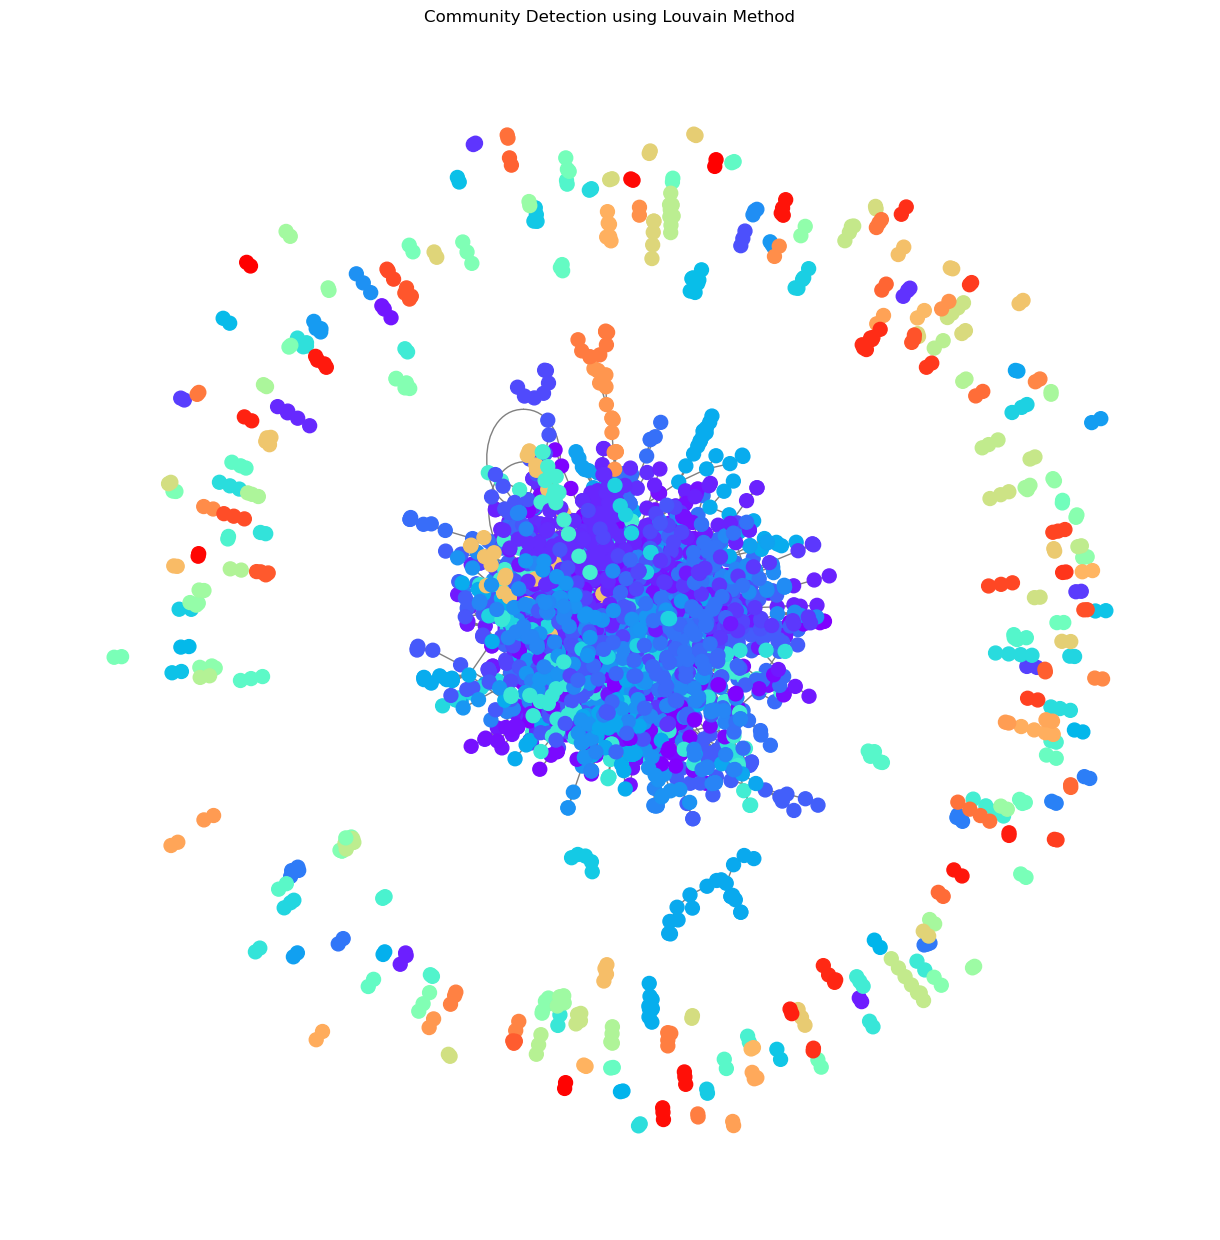

In [27]:
partitions = community.best_partition(G)

# Create a color map for the communities
colors = [partitions[node] for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=False, node_color=colors, cmap=plt.cm.rainbow, node_size=100, edge_color='gray')
bplt.title("Community Detection by using Louvain Method")
plt.show()

analyze and visualize user interactions within the top posts' comments. 

Where nodes represent users, and edges represent interactions (in the form of comment replies) between users. 

And then, uses the community.best_partition(G) function to partition the interaction graph into communities. 

Communities here represent groups of users that have higher interactions among themselves compared to interactions with users outside their group.